In [1]:
# 명령 결과 모두 보기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# 버전 경고 무시
import warnings
warnings.filterwarnings('ignore')

# 판다스와 넘피
import pandas as pd
import numpy as np

# 그림 그리기
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')

# 자료 스케일링
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 모델 선택
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# 성능지표
from sklearn.metrics import accuracy_score, plot_roc_curve 
from sklearn.metrics import plot_confusion_matrix, classification_report

# 파이프라인
from sklearn.pipeline import Pipeline, make_pipeline

# 시각화 툴
import scikitplot as skplt

# 모델저장
from joblib import dump, load

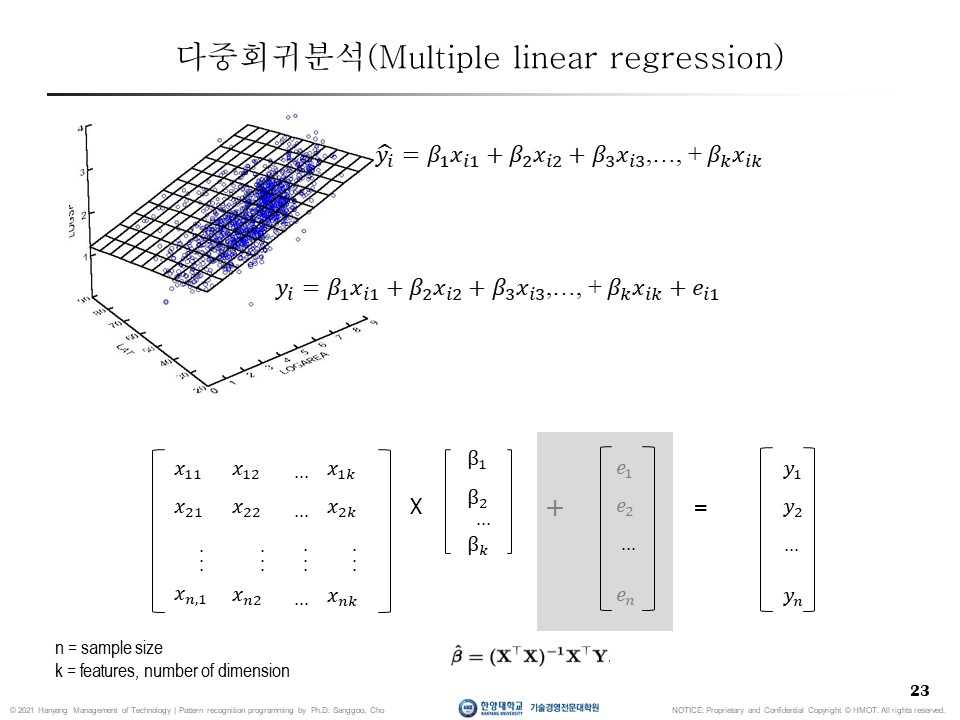

In [2]:
from IPython.display import Image
width=800; height=600
Image(filename='../image/sgd_lgr/슬라이드23.jpg', width=width, height=height)

# Linear Regression

## Simple Linear Regression

A straight-line fit to data. A straight-line fit is a model of the form
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

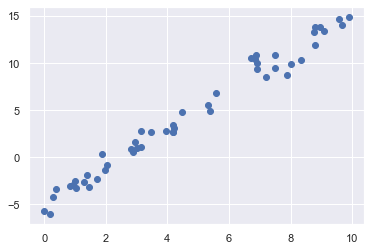

In [3]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

We can use Scikit-Learn's ``LinearRegression`` estimator to fit this data and construct the best-fit line:

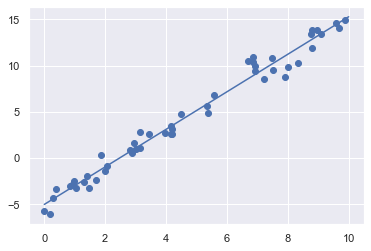

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are ``coef_`` and ``intercept_``:

In [5]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.0272088103606944
Model intercept: -4.9985770855532


The ``LinearRegression`` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where there are multiple $x$ values.

In [6]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

LinearRegression()

0.50000000000001
[ 1.5 -2.   1. ]


## Basis Function Regression

- One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*.
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$
Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

### Polynomial basis functions

This polynomial projection is useful enough that it is built into Scikit-Learn, using the ``PolynomialFeatures`` transformer:

In [7]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(5, include_bias=False)
poly.fit_transform(x[:, None])

array([[   2.,    4.,    8.,   16.,   32.],
       [   3.,    9.,   27.,   81.,  243.],
       [   4.,   16.,   64.,  256., 1024.]])

In [8]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

With this transform in place, we can use the linear model to fit much more complicated relationships between $x$ and $y$. 
For example, here is a sine wave with noise:

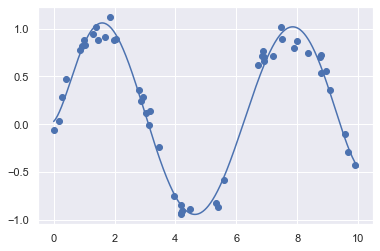

In [9]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

Our linear model, through the use of 7th-order polynomial basis functions, can provide an excellent fit to this non-linear data!

## 로지스틱 회귀(Logistic regression)

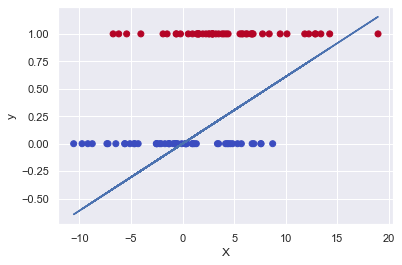

In [10]:
from sklearn.datasets import make_blobs
import statsmodels.api as sm
X, y = make_blobs(100, 1, centers=2, random_state=14, cluster_std=5)
y_predict = sm.OLS(y, X).fit().predict(X)
plt.scatter(X[:, 0], y, c=y, cmap='coolwarm')
plt.plot(X, y_predict); plt.ylabel('y'); plt.xlabel('X'); 

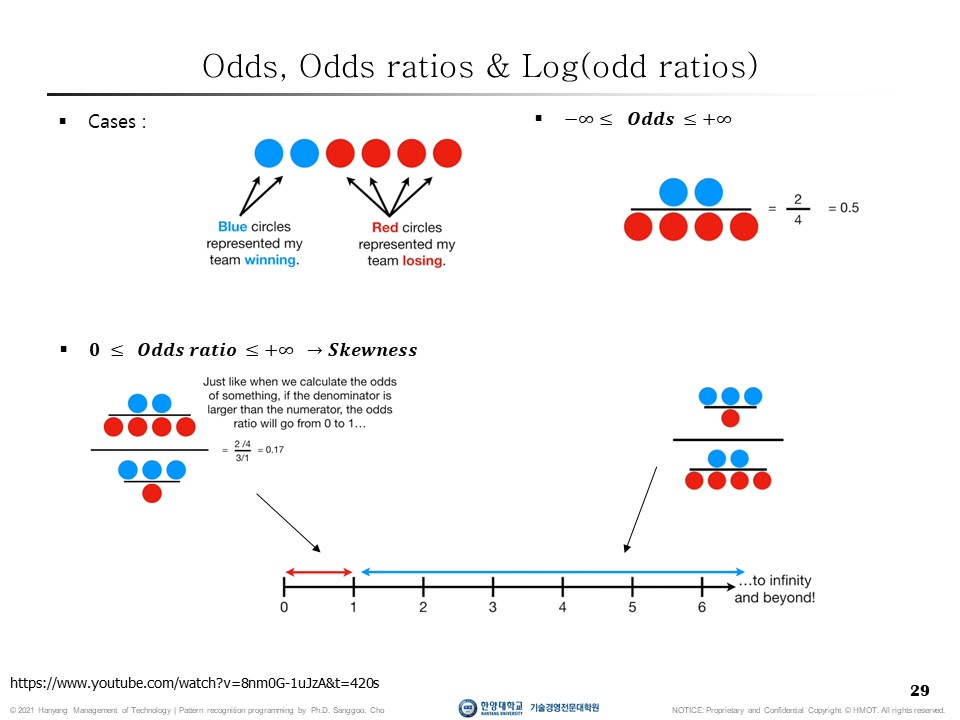

In [11]:
Image(filename='../image/sgd_lgr/슬라이드29.jpg', width=width, height=height)

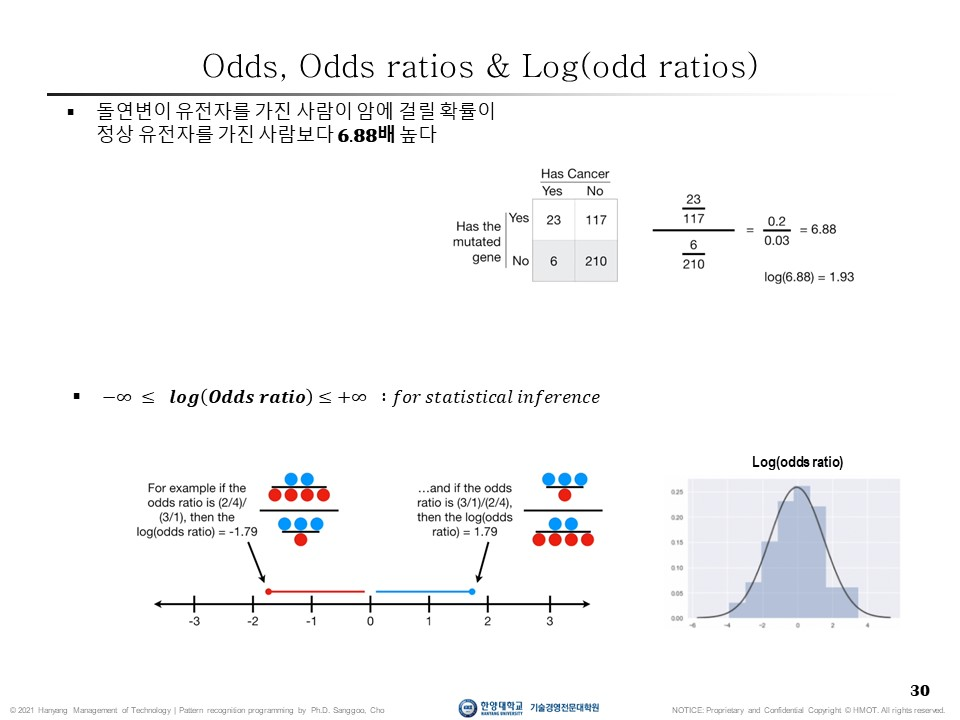

In [12]:
Image(filename='../image/sgd_lgr/슬라이드30.jpg', width=width, height=height)

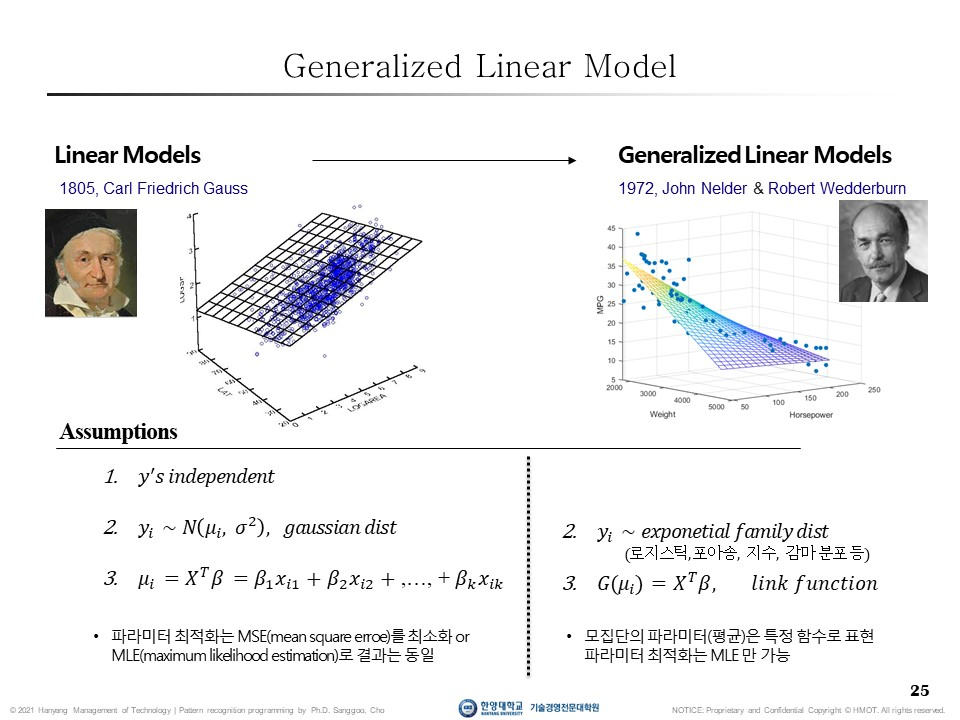

In [13]:
Image(filename='../image/sgd_lgr/슬라이드25.jpg', width=width, height=height)

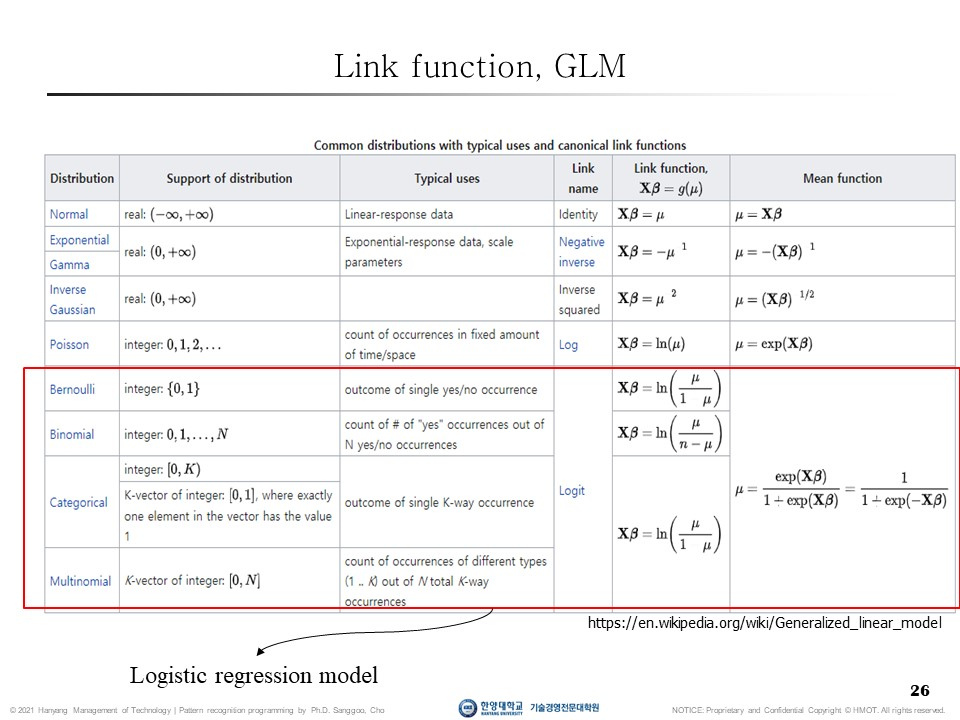

In [14]:
Image(filename='../image/sgd_lgr/슬라이드26.jpg', width=width, height=height)

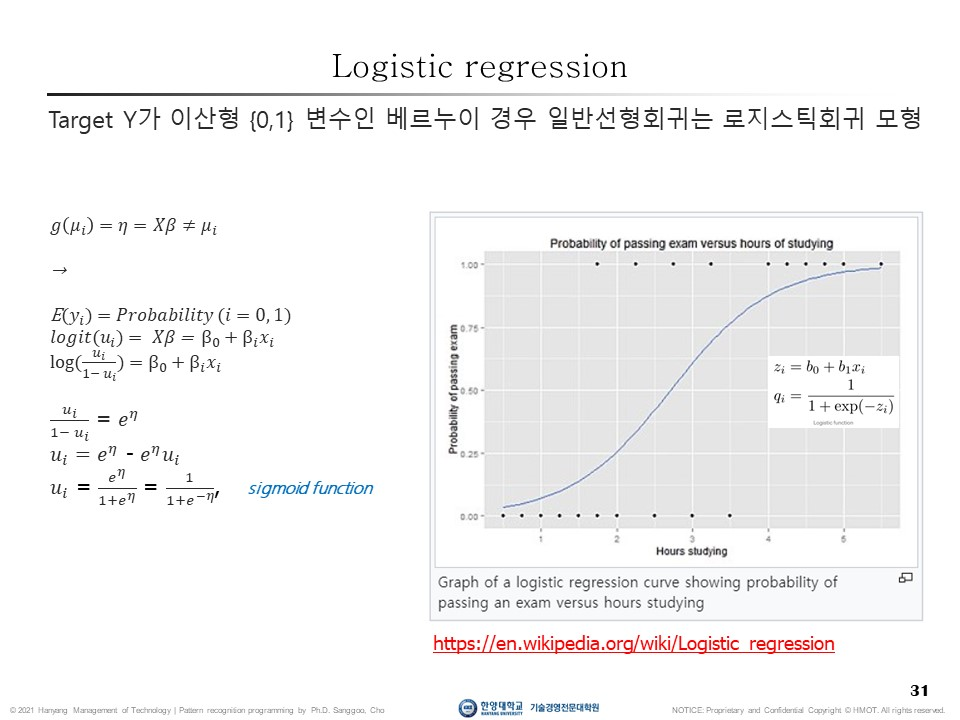

In [15]:
Image(filename='../image/sgd_lgr/슬라이드31.jpg', width=width, height=height)

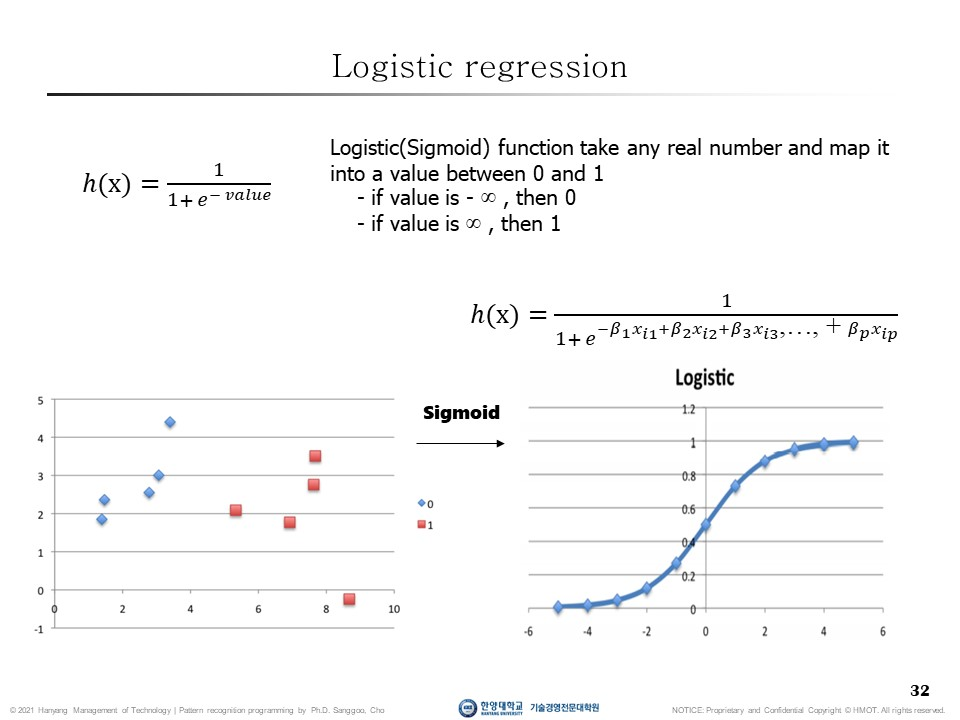

In [16]:
Image(filename='../image/sgd_lgr/슬라이드32.jpg', width=width, height=height)

Optimization terminated successfully.
         Current function value: 0.601782
         Iterations 5


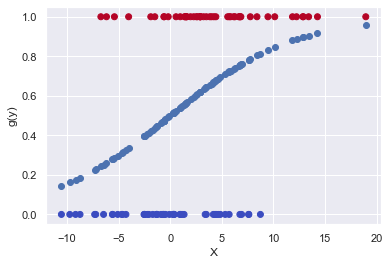

In [17]:
y_predict = sm.Logit(y, X).fit().predict(X) 
plt.scatter(X[:, 0], y, c=y, cmap='coolwarm')
plt.scatter(X, y_predict); plt.ylabel('g(y)'); plt.xlabel('X'); 

In [18]:
rng = np.random.RandomState(1234)
X = 10 * rng.rand(100); X.shape
y = np.cos(X) + 0.25 * rng.randn(100)
X = X.reshape(-1,1); X.shape # X = X[:,np.newaxis] 

(100,)

(100, 1)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=20)),
                ('linearregression', LinearRegression())])

<Figure size 1080x576 with 0 Axes>

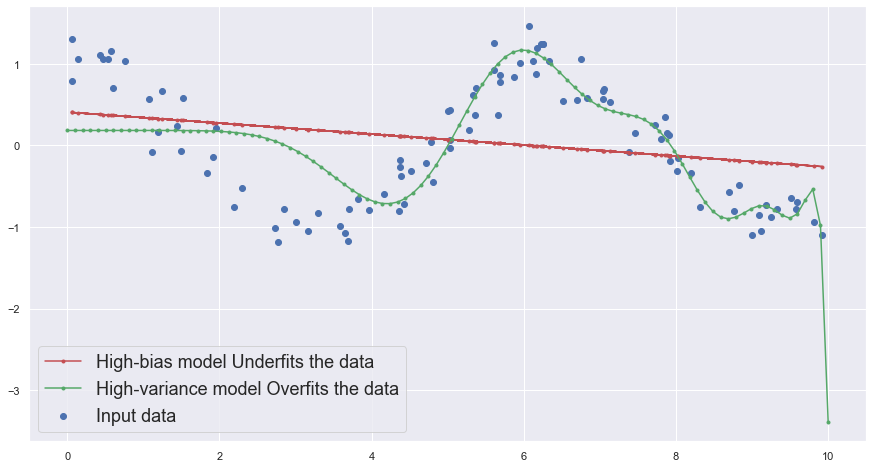

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
y_predict = LinearRegression().fit(X,y).predict(X)
poly_model = make_pipeline(PolynomialFeatures(20), LinearRegression())
poly_model.fit(X, y)
Xfit = np.linspace(0, 10, 100)
yfit = poly_model.predict(Xfit[:,np.newaxis])

plt.figure(figsize=(15, 8));  plt.rc('legend', fontsize=18)
plt.scatter(X, y, label='Input data'); plt.legend()
plt.plot(X, y_predict, 'r.-', label='High-bias model Underfits the data'); plt.legend()
plt.plot(Xfit, yfit, 'g.-', label='High-variance model Overfits the data'); plt.legend()

In [20]:
new_data = np.array([[11.00]])
poly_model.predict(new_data)
LinearRegression().fit(X,y).predict(new_data)

array([-4460.00850736])

array([-0.33203872])

<Figure size 1080x576 with 0 Axes>

(-4.0, 4.0)

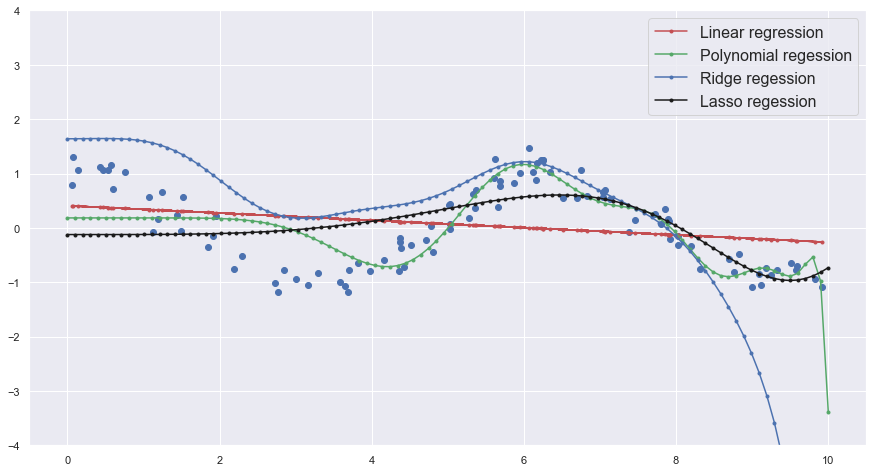

In [21]:
from sklearn.linear_model import Ridge, Lasso
lasso_model = make_pipeline(PolynomialFeatures(20), Lasso(alpha= 1))
predict_lasso = lasso_model.fit(X, y).predict(Xfit[:,np.newaxis])
ridge_model = make_pipeline(PolynomialFeatures(20), Ridge(alpha= 30))
predict_ridge = ridge_model.fit(X, y).predict(Xfit[:,np.newaxis])

plt.figure(figsize=(15, 8)); plt.rc('legend', fontsize=16)
plt.scatter(X, y)
plt.plot(X, y_predict, 'r.-', label='Linear regression'); plt.legend()
plt.plot(Xfit, yfit, 'g.-', label='Polynomial regession'); plt.legend()
plt.plot(Xfit, predict_ridge, 'b.-', label='Ridge regession'); plt.legend()
plt.plot(Xfit, predict_lasso, 'k.-', label='Lasso regession'); plt.legend()
plt.ylim(-4, 4)

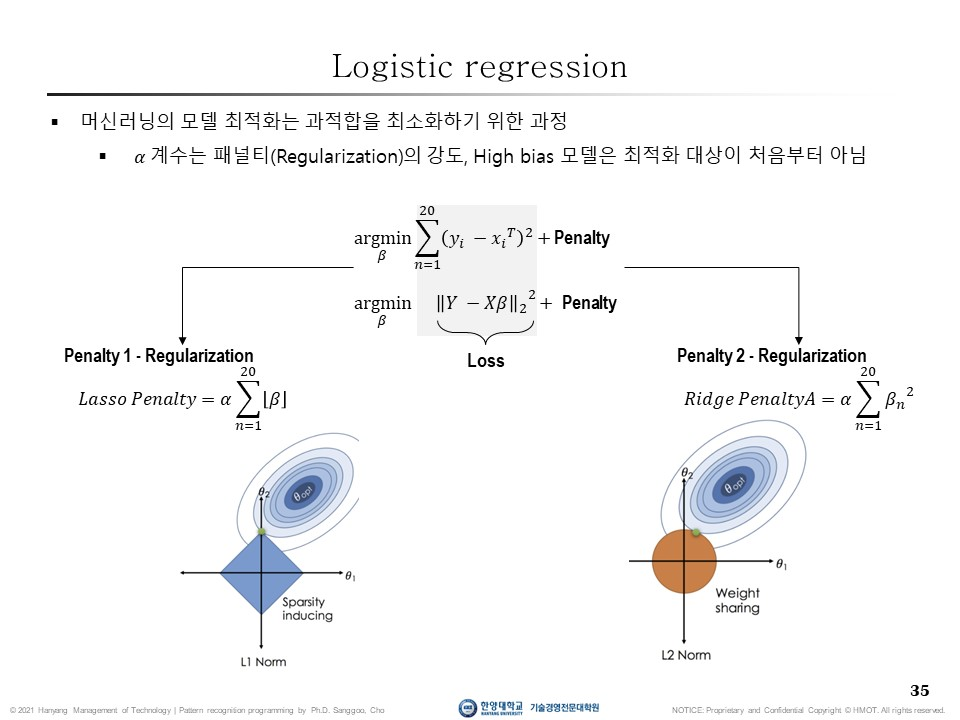

In [22]:
Image(filename='../image/sgd_lgr/슬라이드35.jpg', width=width, height=height)

## 소비자행태 데이터 읽고 훈련시험 데이터 준비

In [23]:
X = pd.read_pickle('../data/X.pkl') # 특성변수만 반영
y = pd.read_pickle('../data/y.pkl')
X.shape, y.shape
X.head()

((3997, 21), (3997,))

,tv4,tv9,drama7,지역_경기인천,지역_부산울산경남,drama3,지역_대구경북,drama15,tv15,drama9,...,연령,인터넷평일,직업_무직기타,모바일주말,모바일평일,drama8,인터넷주말,성별_여,성별_남,drama4
0,0.579234,2.30963,-1.205273,0,0,-0.396918,0,-0.089837,-0.067259,3.407174,...,-1.808444,-1.533759,0,0.900657,1.451424,-0.371179,1.443933,0,1,-1.637911
1,0.579234,-0.43297,-1.205273,0,0,-0.396918,0,-0.089837,-0.067259,-0.293498,...,-1.808444,-0.804841,0,-0.729510,-0.863126,-0.371179,-0.371716,0,1,0.435808
2,0.579234,2.30963,-1.205273,0,0,-0.396918,0,-0.089837,-0.067259,-0.293498,...,-1.808444,0.652994,0,1.222392,0.525604,-0.371179,0.082196,0,1,0.435808
3,-1.699504,2.30963,0.782134,0,0,-0.396918,0,-0.089837,-0.067259,-0.293498,...,-1.808444,0.139761,0,-0.338293,-0.400216,-0.371179,0.379376,0,1,0.435808
4,0.579234,2.30963,-1.205273,0,0,-0.396918,0,-0.089837,-0.067259,-0.293498,...,-1.808444,-1.533759,0,1.222392,1.451424,-0.371179,0.082196,0,1,0.435808


In [24]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, 
                                                  stratify= y, random_state=11)
X_train.shape, X_test.shape
y_train.shape, y_test.shape

((3197, 21), (800, 21))

((3197,), (800,))

In [25]:
from sklearn.linear_model import LogisticRegression
np.random.seed(1357)

In [28]:
kf = KFold(n_splits=5)
model = LogisticRegression(random_state=11)
model.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [29]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 11,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [30]:
params = {'C': np.logspace(-4, 4, 20), 'penalty': ['l1', 'l2']}
grid = RandomizedSearchCV(model, param_distributions=params, cv=kf,
                          scoring = 'recall_macro')
grid.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LogisticRegression(random_state=11),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2']},
                   scoring='recall_macro')

In [31]:
print('optimal train score: {:.3f}'.format(grid.best_score_))
print('test score: {:.3f}'.format(grid.score(X_test, y_test)))
print('optimal parameter: {}'.format(grid.best_params_))

optimal train score: 0.587
test score: 0.584
optimal parameter: {'penalty': 'l2', 'C': 78.47599703514607}


In [32]:
model= LogisticRegression(random_state=11, penalty= 'l2', C=78.47599703514607)
model.fit(X_train, y_train)
model.coef_
model.intercept_

LogisticRegression(C=78.47599703514607, random_state=11)

array([[ 0.205375  ,  0.17407211, -0.08048399, -0.34876253,  0.93932127,
         0.15644187, -0.9052396 ,  0.09683053, -0.08574112,  0.07018272,
        -0.03964866, -0.00814411, -0.13790751, -0.1378582 ,  0.1152942 ,
        -0.05482229, -0.00334368,  0.09562559, -0.06504943, -0.36547936,
        -0.08833477]])

array([-0.43102029])

<AxesSubplot:xlabel='변수'>

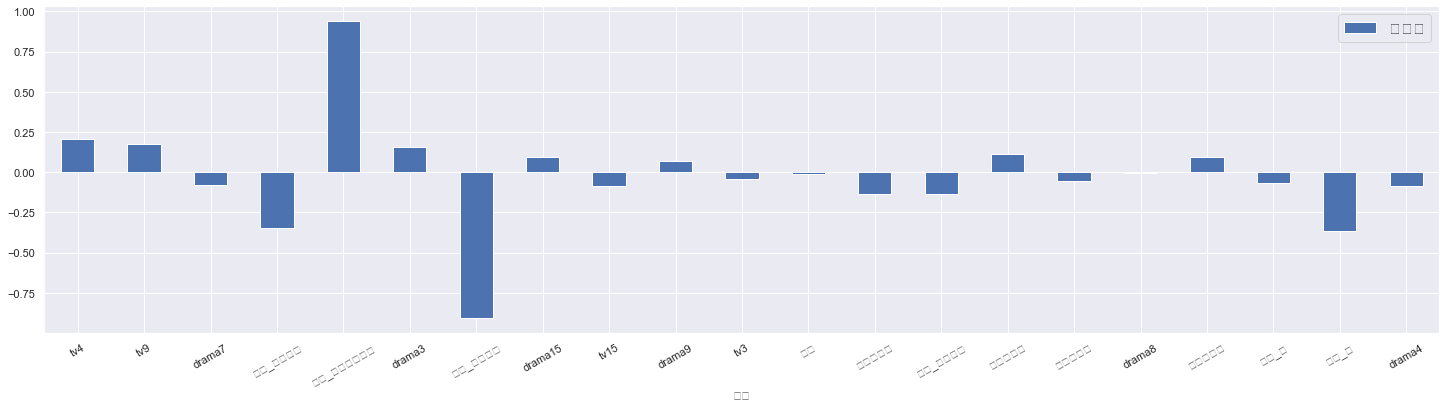

In [33]:
data = zip(X_train.columns, np.squeeze(model.coef_))
(pd.DataFrame(data, columns =['변수', '계수값']).set_index('변수').
plot.bar(rot='30', figsize=(25,6)))

In [34]:
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.67875

In [36]:
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
y_proba = model.predict_proba(X_test)
y_proba

array([[0.32358941, 0.67641059],
       [0.61629203, 0.38370797],
       [0.66782815, 0.33217185],
       ...,
       [0.69503578, 0.30496422],
       [0.68900068, 0.31099932],
       [0.61676184, 0.38323816]])

(array([ 37., 124., 128., 180., 148.,  64.,  50.,  35.,  21.,  13.]),
 array([0.05186079, 0.12950476, 0.20714874, 0.28479271, 0.36243668,
        0.44008065, 0.51772463, 0.5953686 , 0.67301257, 0.75065654,
        0.82830052]),
 <BarContainer object of 10 artists>)

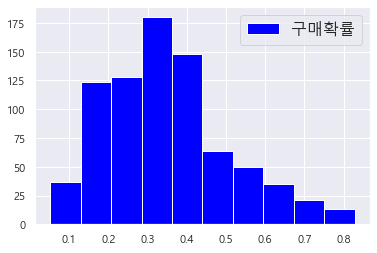

(array([ 13.,  21.,  35.,  50.,  64., 148., 180., 128., 124.,  37.]),
 array([0.17169948, 0.24934346, 0.32698743, 0.4046314 , 0.48227537,
        0.55991935, 0.63756332, 0.71520729, 0.79285126, 0.87049524,
        0.94813921]),
 <BarContainer object of 10 artists>)

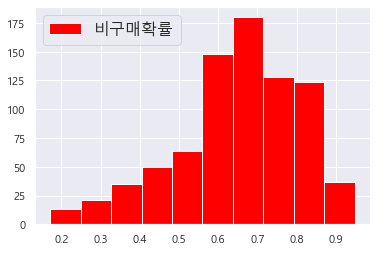

In [35]:
plt.hist(y_proba[:, 1], color ='blue', label='구매확률'); plt.legend(); plt.show()
plt.hist(y_proba[:, 0], color ='red', label='비구매확률'); plt.legend()

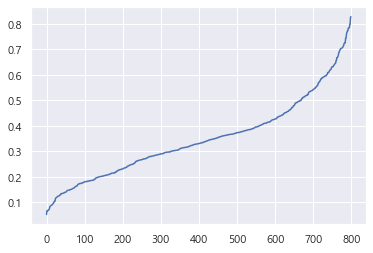

In [33]:
plt.plot(np.arange(len(y_test)), np.sort(y_proba[:,1]))

<AxesSubplot:>

<AxesSubplot:>

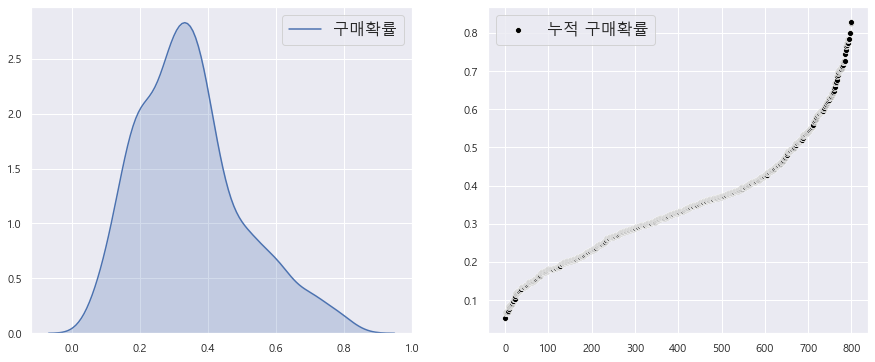

In [34]:
fig, ax = plt.subplots(ncols=2, figsize=(15,6))
sns.kdeplot(np.sort(y_proba[:,1]), shade=True, label='구매확률', ax=ax[0])
x=np.arange(len(y_test)); y=np.sort(y_proba[:,1])
sns.scatterplot(x=x, y=y, color='black', label='누적 구매확률', ax=ax[1])

In [35]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.70      0.89      0.78       522
           1       0.58      0.27      0.37       278

    accuracy                           0.68       800
   macro avg       0.64      0.58      0.58       800
weighted avg       0.66      0.68      0.64       800



In [38]:
grid.best_estimator_

LogisticRegression(C=78.47599703514607, random_state=11)

In [36]:
dump(grid.best_estimator_, '../output/lgr.joblib')

['../output/lgr.joblib']

In [37]:
model = load('../output/lgr.joblib')
model.get_params()['solver']

'lbfgs'

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

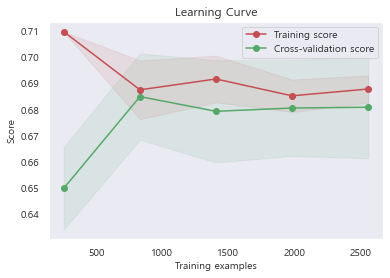

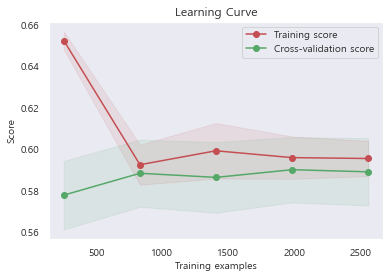

In [38]:
skplt.estimators.plot_learning_curve(model, X_train, y_train, scoring='accuracy')
skplt.estimators.plot_learning_curve(model, X_train, y_train, scoring='recall_macro')

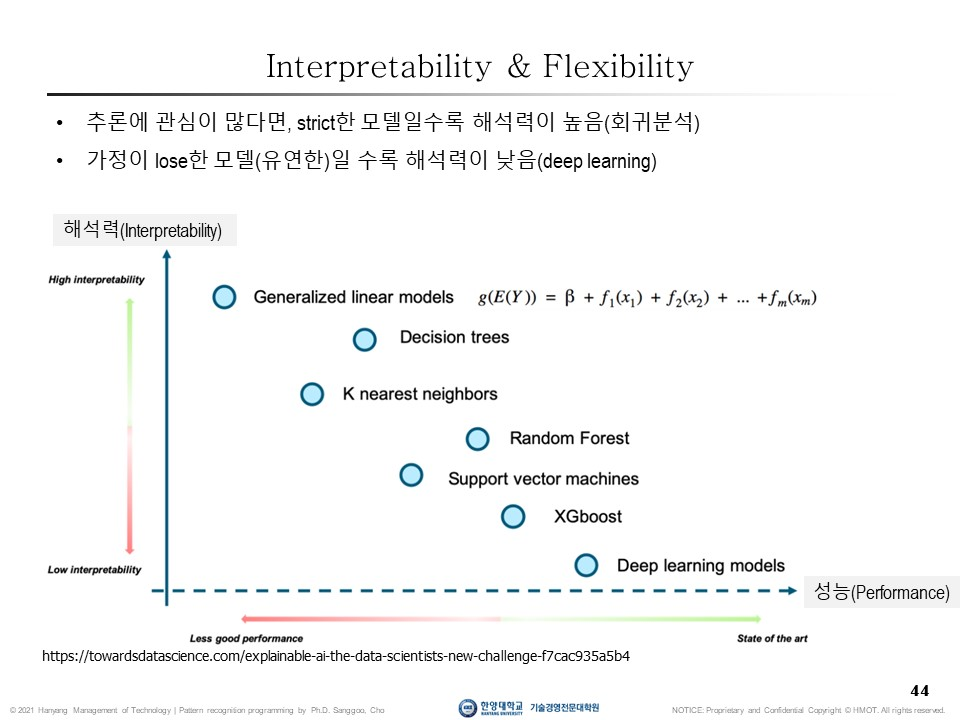

In [39]:
Image(filename='../image/sgd_lgr/슬라이드44.jpg', width=width, height=height)

# END